['Afganistán', 'Albania', 'Alemania', 'Andorra', 'Angola', 'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bangladés', 'Barbados', 'Baréin', 'Bélgica', 'Belice', 'Benín', 'Bielorrusia', 'Birmania', 'Bolivia', 'Bosnia y Herzegovina', 'Botsuana', 'Brasil', 'Brunéi', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bután', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Catar', 'Chad', 'Chile', 'China', 'Chipre', 'Ciudad del Vaticano', 'Colombia', 'Comoras', 'Corea del Norte', 'Corea del Sur', 'Costa de Marfil', 'Costa Rica', 'Croacia', 'Cuba', 'Dinamarca', 'Dominica', 'Ecuador', 'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovaquia', 'Eslovenia', 'España', 'Estados Unidos', 'Estonia', 'Eswatini', 'Etiopía', 'Filipinas', 'Finlandia', 'Fiyi', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Granada', 'Grecia', 'Guatemala', 'Guyana', 'Guinea', 'Guinea-Bisáu', 'Guinea Ecuatorial', 'Haití', 'Honduras', 'Hu

[nltk_data] Downloading package punkt to /home/mfrias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mfrias/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/mfrias/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/mfrias/nltk_data...
[nltk_data]   Package words is already up-to-date!


['Dólar', 'Ganancias Vuelve', 'Banco Central', 'Alberto Fernández', 'Gabinete', 'Lucas Bianchi', 'Caribe Prohibición', 'Dólar', 'Barcelona', 'Libertadores Bassedas', 'Méndez', 'Cuándo', 'River César Farías', 'Águilas Doradas Ríonegro Día', 'Kily González', 'City Group', 'Nahuel Bustos', 'Quiniela', 'Miguel Ponce', 'Fondo Monetario Internacional', 'Cannes Euro', 'Alberto', 'Alexia', 'Habló', 'Marta Vidal', 'Amazonia Tan Bionica', 'Muerte', 'Emmily Rodrígues', 'Sáenz Valiente', 'Complicaciones', 'Luis Juez', 'Luis Juez', 'Juan Schiaretti', 'Jornada', 'Ciencia', 'Parlamento', 'Hernán Madera', 'Sergio Berni', 'Sergio Massa', 'Agustín Rossi', 'Gobierno', 'Juan Carnevale', 'Massa', 'Putin', 'Ucrania El', 'Corte Suprema', 'Maximiliano Guerra', 'Patricia Bullrich', 'Carmen Sevilla', 'Para', 'San Lorenzo', 'Alertan', 'Francisco Cerúndolo', 'Eastbourne Con', 'Unión', 'Patria', 'Argentina Tras', 'San Juan', 'Menores', 'Sáenz Valiente', 'Piden', 'Silvina Luna', 'Rubén Insúa', 'Lucas Pratto', 'San 

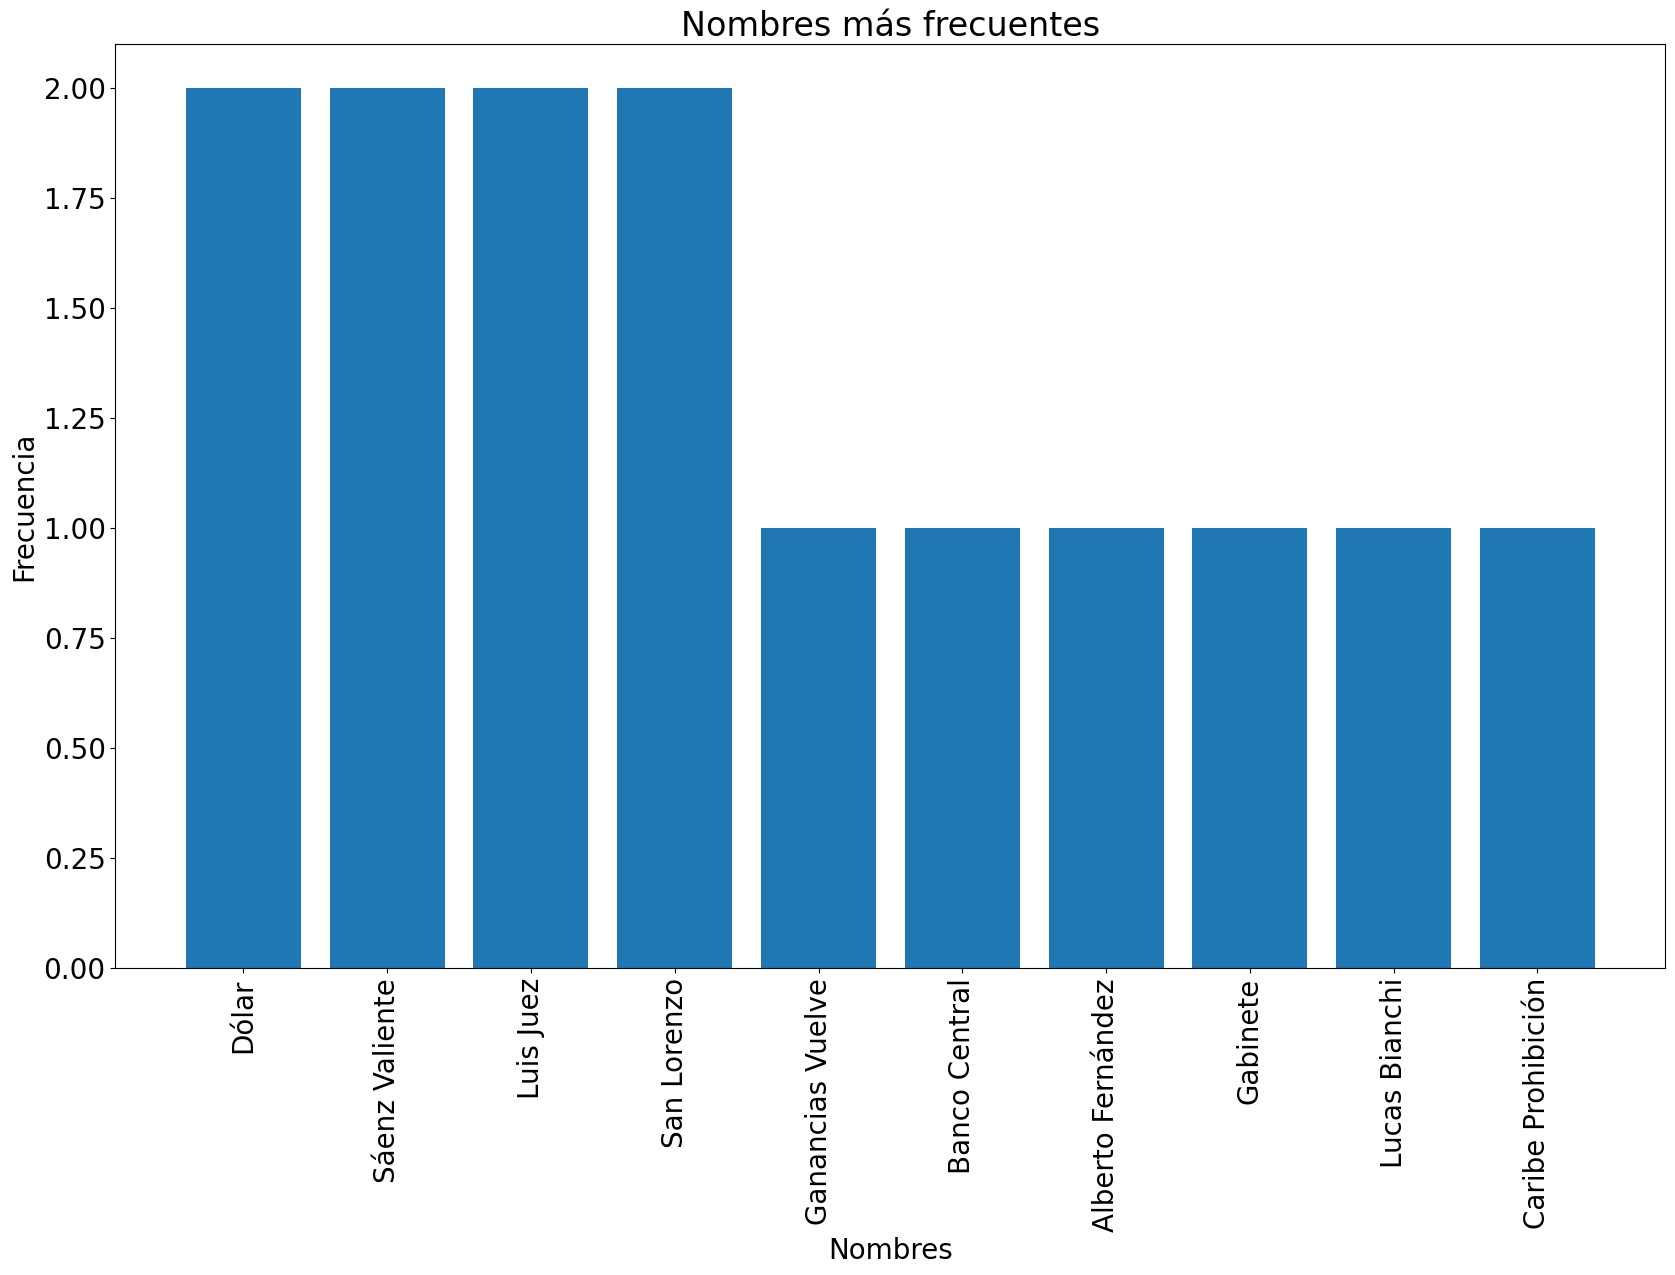

In [13]:
import sqlite3
import nltk
import re
from matplotlib import pyplot as plt

paises = [
    'Afganistán', 'Albania', 'Alemania', 'Andorra', 'Angola', 'Antigua y Barbuda',
    'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaiyán', 'Bahamas', 'Bangladés', 'Barbados', 'Baréin', 'Bélgica', 'Belice',
    'Benín', 'Bielorrusia', 'Birmania', 'Bolivia', 'Bosnia y Herzegovina', 'Botsuana',
    'Brasil', 'Brunéi', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bután', 'Cabo Verde',
    'Camboya', 'Camerún', 'Canadá', 'Catar', 'Chad', 'Chile', 'China', 'Chipre',
    'Ciudad del Vaticano', 'Colombia', 'Comoras', 'Corea del Norte', 'Corea del Sur',
    'Costa de Marfil', 'Costa Rica', 'Croacia', 'Cuba', 'Dinamarca', 'Dominica',
    'Ecuador', 'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovaquia',
    'Eslovenia', 'España', 'Estados Unidos', 'Estonia', 'Eswatini', 'Etiopía', 'Filipinas',
    'Finlandia', 'Fiyi', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Granada',
    'Grecia', 'Guatemala', 'Guyana', 'Guinea', 'Guinea-Bisáu', 'Guinea Ecuatorial',
    'Haití', 'Honduras', 'Hungría', 'India', 'Indonesia', 'Irak', 'Irán', 'Irlanda',
    'Islandia', 'Islas Marshall', 'Islas Salomón', 'Israel', 'Italia', 'Jamaica',
    'Japón', 'Jordania', 'Kazajistán', 'Kenia', 'Kirguistán', 'Kiribati', 'Kuwait',
    'Laos', 'Lesoto', 'Letonia', 'Líbano', 'Liberia', 'Libia', 'Liechtenstein',
    'Lituania', 'Luxemburgo', 'Madagascar', 'Malasia', 'Malaui', 'Maldivas', 'Malí',
    'Malta', 'Marruecos', 'Mauricio', 'Mauritania', 'México', 'Micronesia', 'Moldavia',
    'Mónaco', 'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nauru', 'Nepal',
    'Nicaragua', 'Níger', 'Nigeria', 'Noruega', 'Nueva Zelanda', 'Omán', 'Países Bajos',
    'Pakistán', 'Palaos', 'Panamá', 'Papúa Nueva Guinea', 'Paraguay', 'Perú', 'Polonia',
    'Portugal', 'Reino Unido', 'República Centroafricana', 'República Checa',
    'República del Congo', 'República Democrática del Congo', 'República Dominicana',
    'República Sudafricana', 'Ruanda', 'Rumanía', 'Rusia', 'Samoa', 'San Cristóbal y Nieves',
    'San Marino', 'San Vicente y las Granadinas', 'Santa Lucía', 'Santo Tomé y Príncipe',
    'Senegal', 'Serbia', 'Seychelles', 'Sierra Leona', 'Singapur', 'Siria', 'Somalia',
    'Sri Lanka', 'Suazilandia', 'Sudán', 'Sudán del Sur', 'Suecia', 'Suiza', 'Surinam',
    'Tailandia', 'Tanzania', 'Tayikistán', 'Timor Oriental', 'Togo', 'Tonga',
    'Trinidad y Tobago', 'Túnez', 'Turkmenistán', 'Turquía', 'Tuvalu', 'Ucrania',
    'Uganda', 'Uruguay', 'Uzbekistán', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen',
    'Yibuti', 'Zambia', 'Zimbabue'
]

print(paises)


conn = sqlite3.connect('DBTic.db')
c = conn.cursor()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def recognize_names(text):
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    named_entities = nltk.ne_chunk_sents(tagged_sentences, binary=True)

    names = []
    for tree in named_entities:
        for entity in tree:
            if hasattr(entity, 'label') and entity.label() == 'NE':
                name = ' '.join([child[0] for child in entity])
                if not re.search(r'\b[A-Z]+\b', name) and name not in paises:
                    names.append(name)

    return names

# Obtener títulos de las tablas
tables = ["Ambito_Financiero", "Ole", "Perfil", "Telam"]
titles = []
for table in tables:
    c.execute(f"SELECT Titulo FROM {table}")
    result = c.fetchall()
    titles.extend([row[0] for row in result])

text = ' '.join(titles)

names = recognize_names(text)

print(names)

# Generar gráfico de barras con la frecuencia de los nombres
name_freq = nltk.FreqDist(names)
top_names = name_freq.most_common(10)  # Obtener los nombres más frecuentes

names, frequencies = zip(*top_names)

plt.rcParams['font.size'] = 20
plt.figure(figsize=(20, 12))
plt.bar(names, frequencies)
plt.xlabel('Nombres')
plt.ylabel('Frecuencia')
plt.title('Nombres más frecuentes')
plt.xticks(rotation=90)
plt.show()

conn.commit()
conn.close()
